PostgreSQL connection is closed


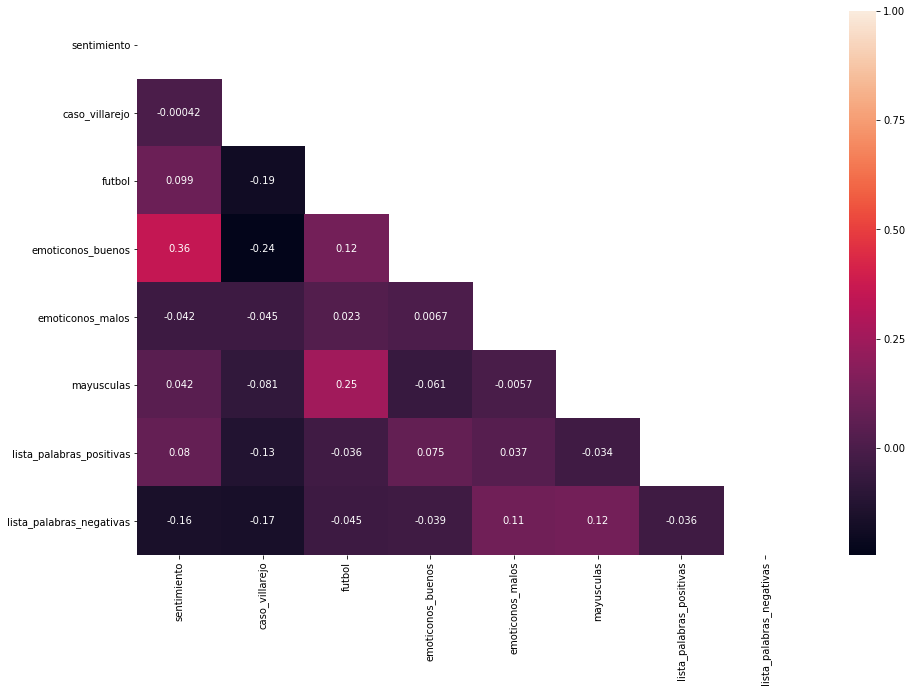

In [29]:
import psycopg2
import sys, nltk, re, string, heapq
from psycopg2 import Error

import pandas as pd
import pandas.io.sql as sqlio

import numpy as np
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection

def obtenerTweets():

    try:
        
        connection = crearConexion()
        query = """
                select text, sentimiento, caso_villarejo, futbol, emoticonos_buenos,
                emoticonos_malos, mayusculas, lista_palabras_positivas, lista_palabras_negativas
                from training_set_bueno
                """
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def main():
    
    tweets = obtenerTweets()
    matriz_correlacion = tweets.corr()
    
    mask = np.zeros_like(matriz_correlacion, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(15,10))
    sns.heatmap(matriz_correlacion, annot=True, mask = mask)
    
    
if __name__ == '__main__':
    main()





